In [276]:
import numpy as np
import matplotlib.pyplot as plt

In [277]:
# 1. Pobierz parametry
N = 4  # liczba osobników
BETA_0 = 0.3  # maksymalny poziom przyciągania do lepszego osobnika
GAMMA_0 = 0.1  # określa jak bardzo przyciąganie spada wraz z odległością
MU_0 = 0.05  # poziom mutacji (określa poziom losowej zmiany)
X_MIN = [0, 0]
X_MAX = [100, 100]
ITERACJE_LICZBA = 30

In [278]:
def funkcja_przystosowania(x1, x2):
    return np.sin(x1 * 0.05) + np.sin(x2 * 0.05) + 0.4 * np.sin(x1 * 0.15) * np.sin(x2 * 0.15)

In [279]:
x = np.linspace(X_MIN[0], X_MAX[0], 100)
y = np.linspace(X_MIN[1], X_MAX[1], 100)
X_GRID, Y_GRID = np.meshgrid(x, y)
Z_GRID = funkcja_przystosowania(X_GRID, Y_GRID)

In [280]:
def rysuj_iteracje(fireflies, best_firefly, best_rating, iteration):
    plt.figure(figsize=(8, 8))
    plt.contour(X_GRID, Y_GRID, Z_GRID, levels=15)
    plt.colorbar()
    plt.scatter([f[0] for f in fireflies], [f[1] for f in fireflies], color='white', edgecolor='red', marker='o', s=100, label='Świetliki')
    plt.scatter(best_firefly[0], best_firefly[1], color='red', marker='o', s=100, label='Najlepszy świetlik')
    plt.title(f'Iteracja: {iteration + 1}, najlepszy wynik to: {best_rating:.5f}')
    plt.legend()
    plt.show()

In [281]:
# 2. Wyliczenie gamma, mu gdzie i to identyfikator atrybutu wejściowego
ZAKRES = np.array(X_MAX) - np.array(X_MIN)
R_MAX = np.sqrt(np.sum(ZAKRES ** 2))
GAMMA = GAMMA_0 / (R_MAX ** 2)
MU = MU_0 * ZAKRES

In [282]:
# 3. Stworzenie tablicy dwuwymiarowej X określającej położenie początkowe osobników o rozmiarze N x n (n - liczba atrybutów, N – liczba osobników) o początkowych wartościach wylosowanych korzystając z zakresu zmienności każdego atrybutu (xmin,i , xmax,i)

n = len(X_MIN)
X = np.random.uniform(low=X_MIN, high=X_MAX, size=(N, n))

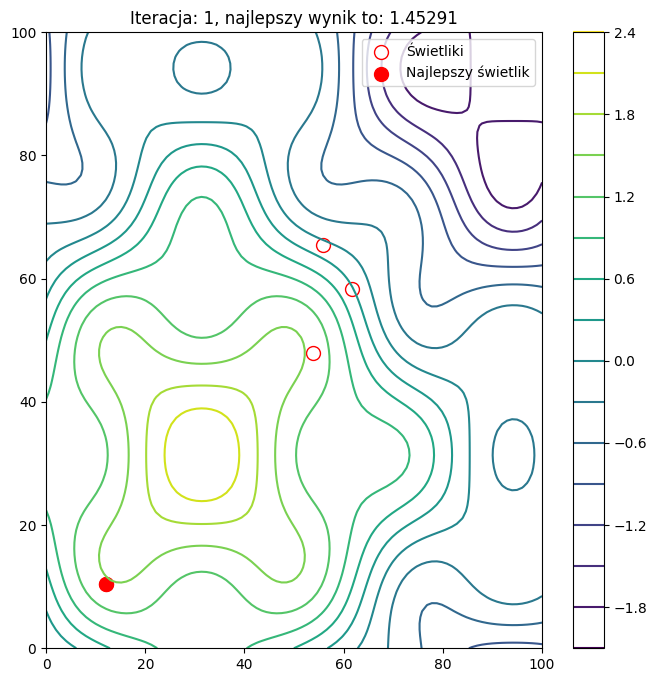

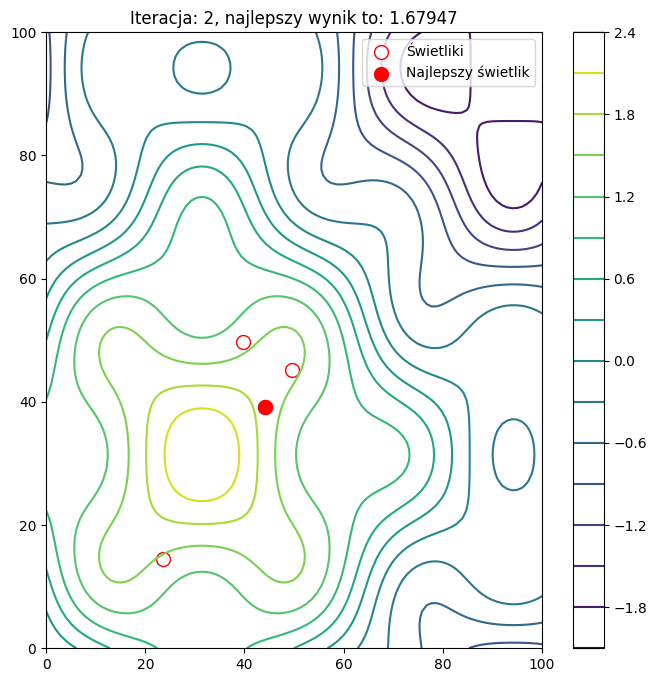

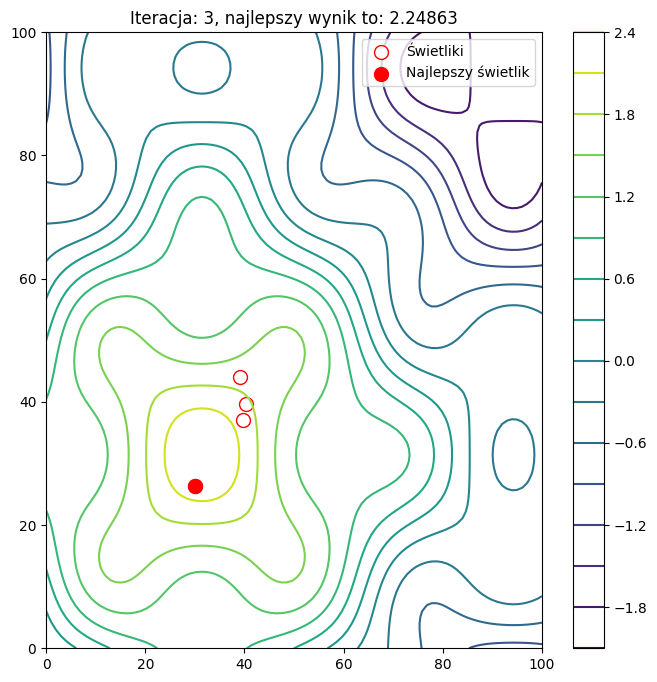

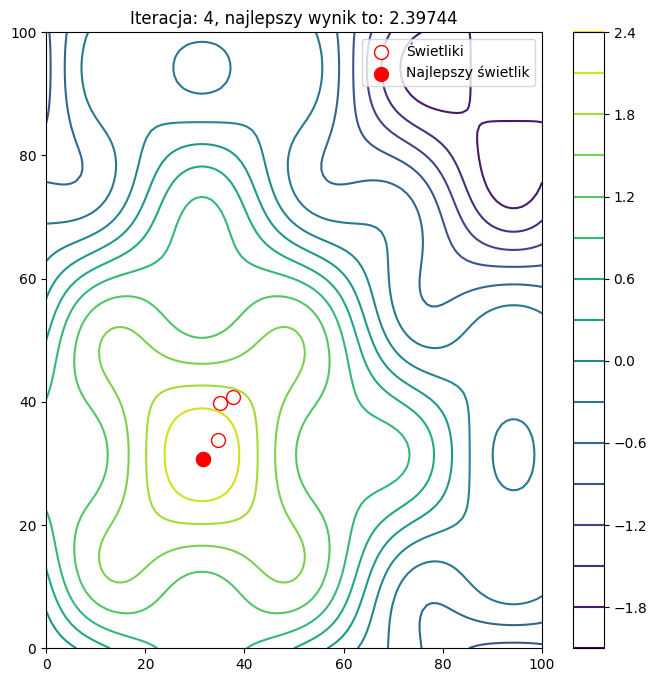

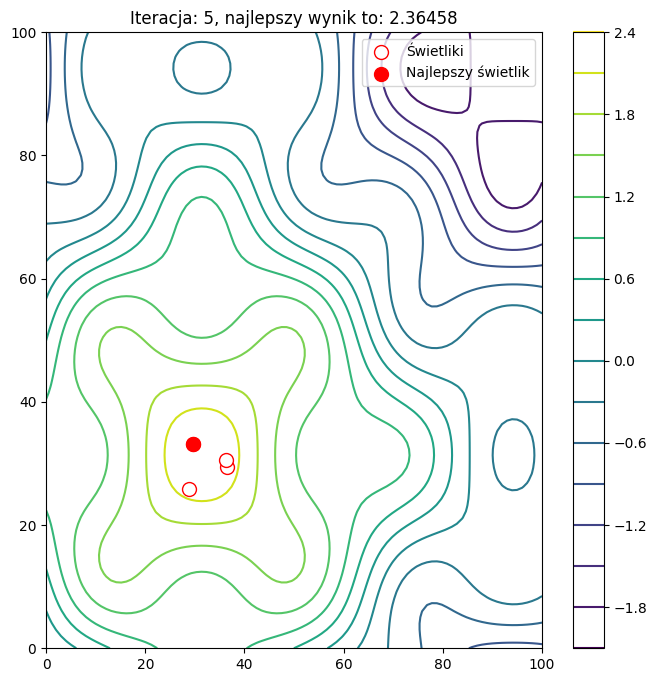

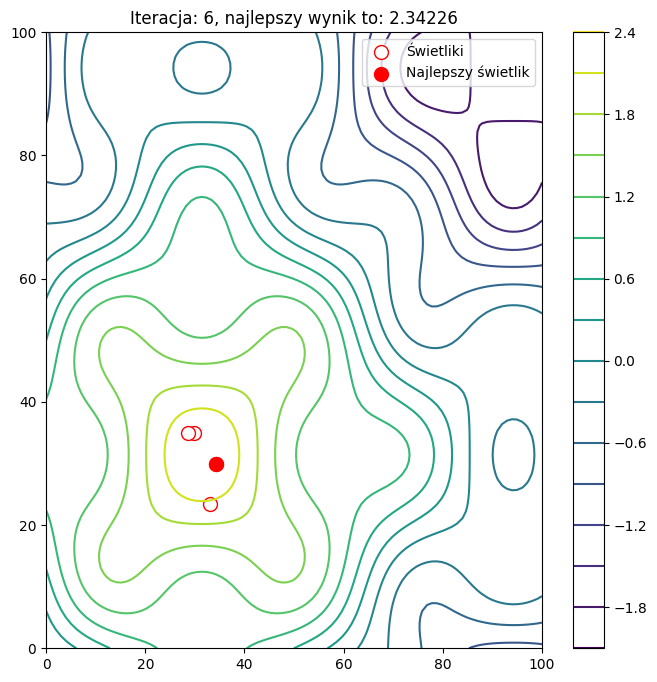

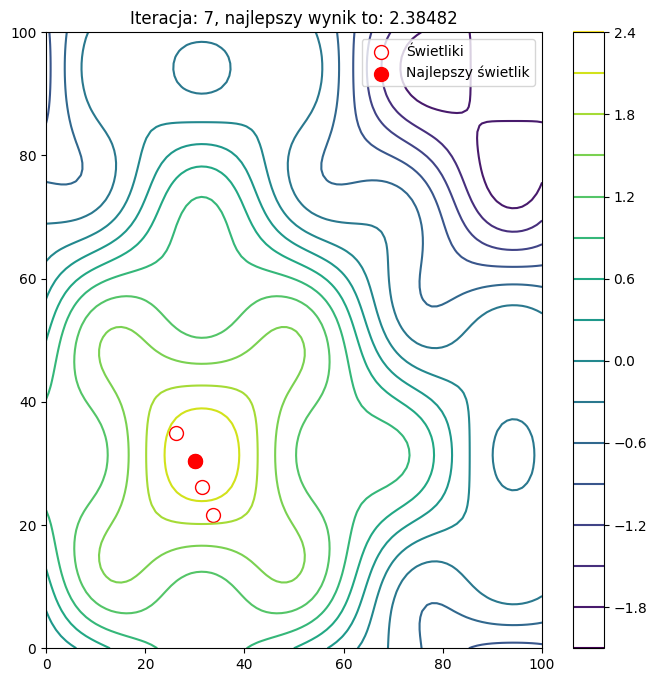

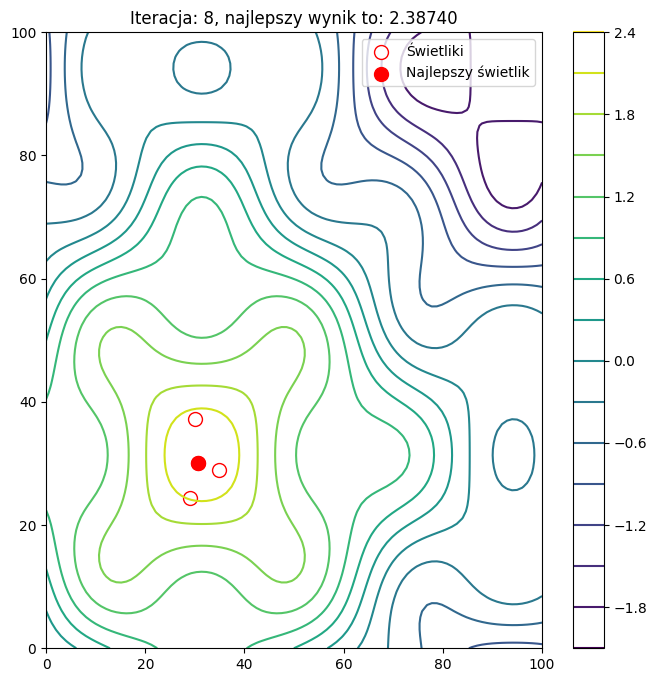

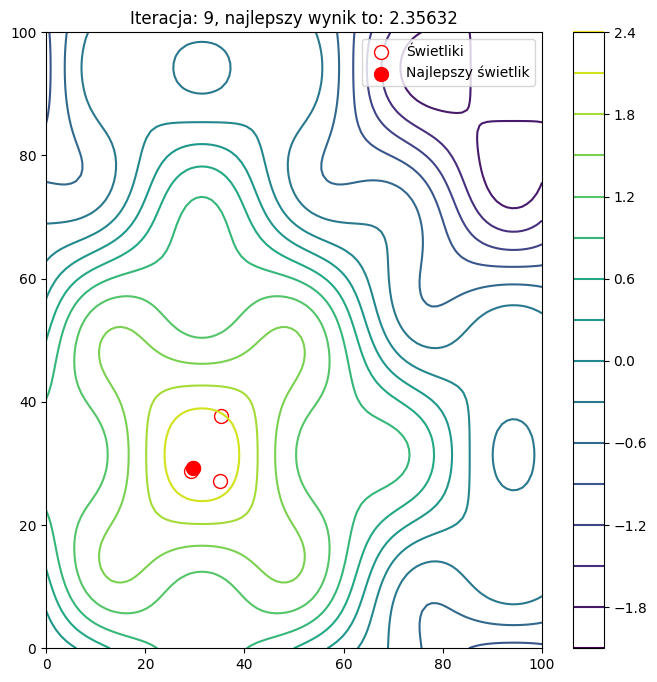

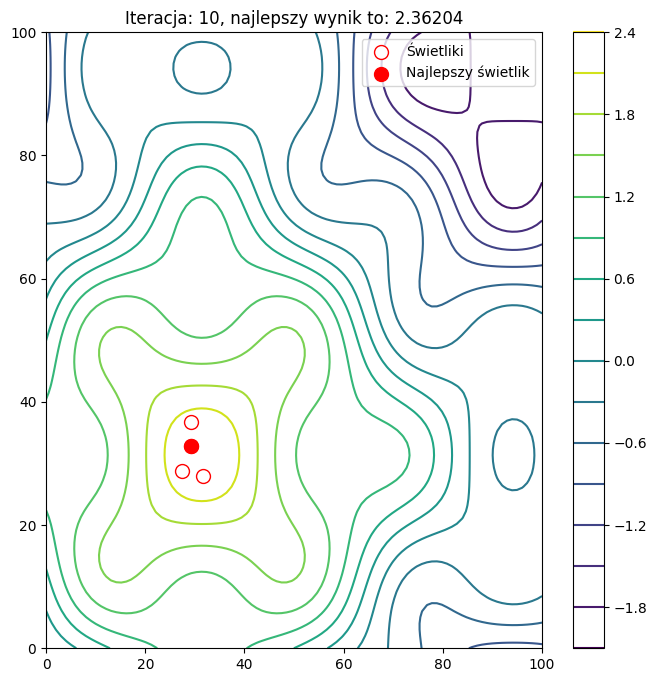

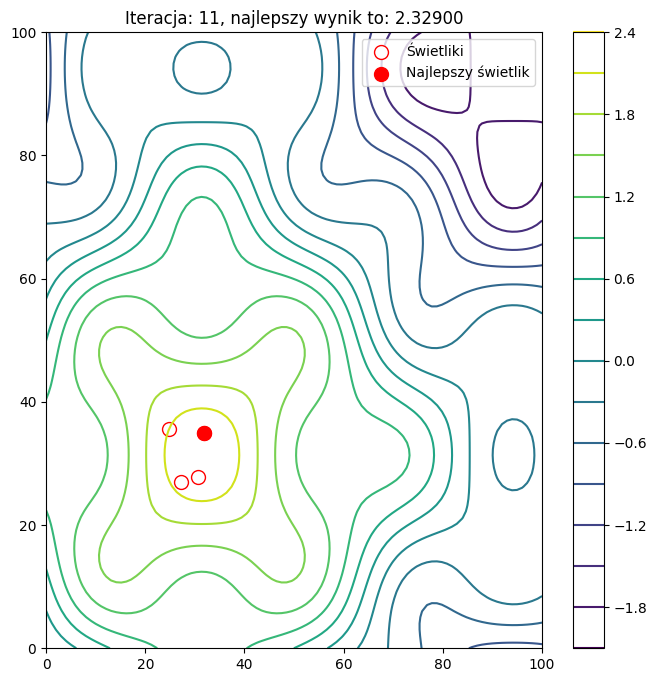

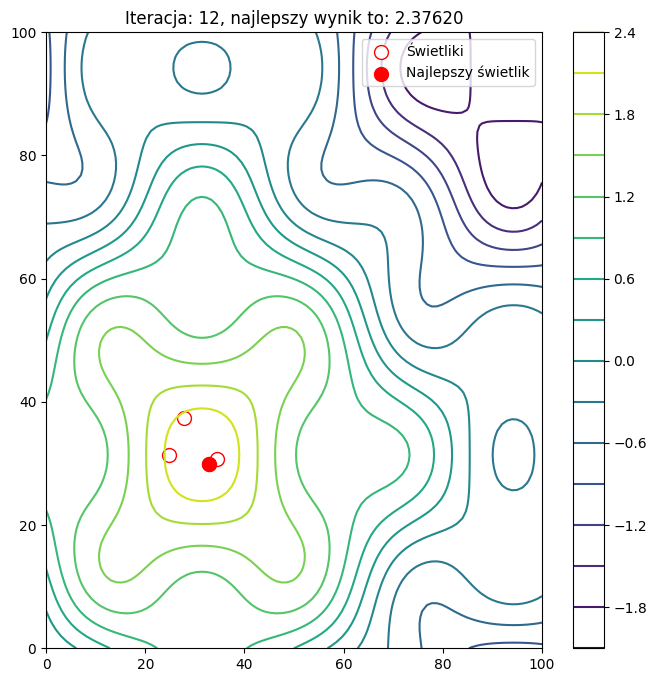

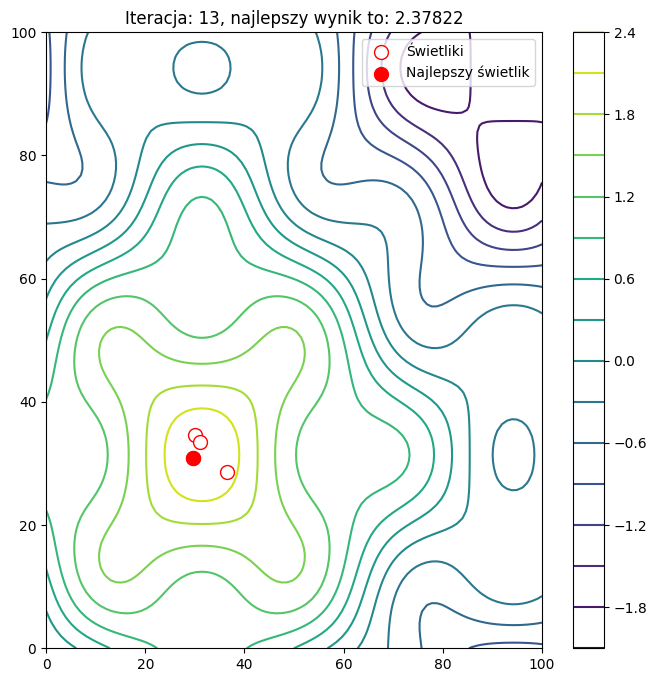

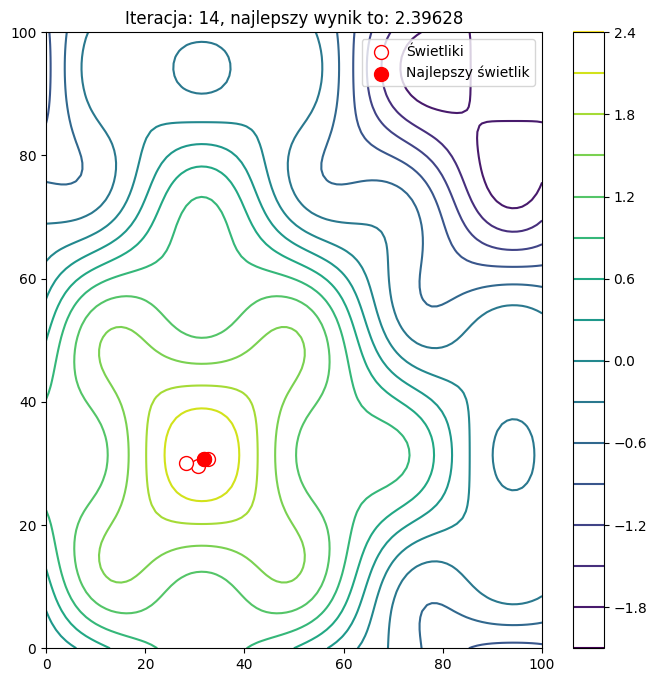

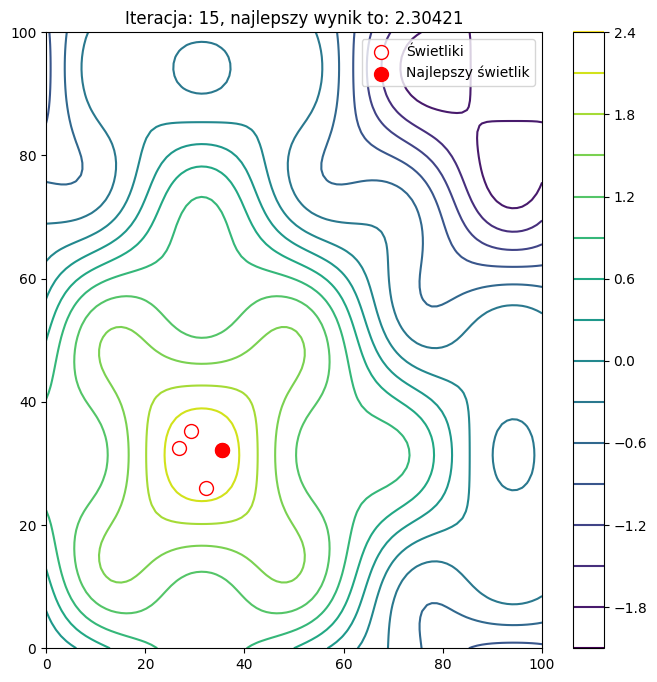

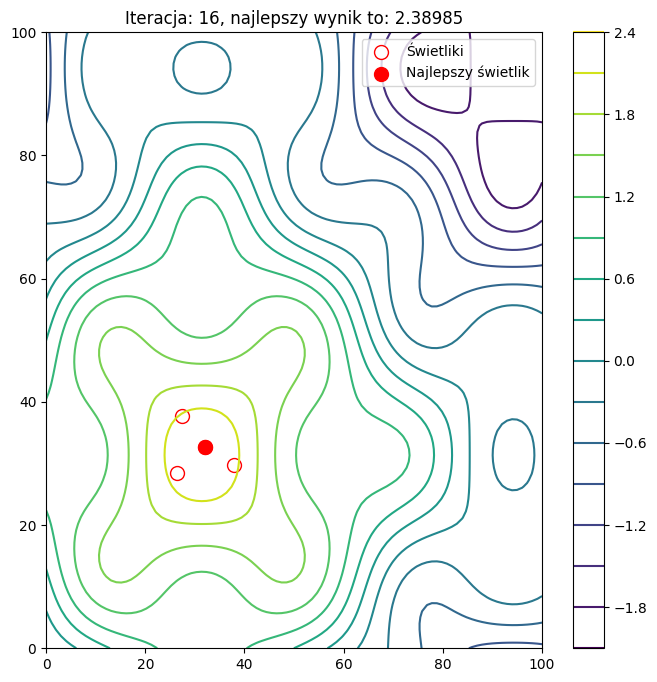

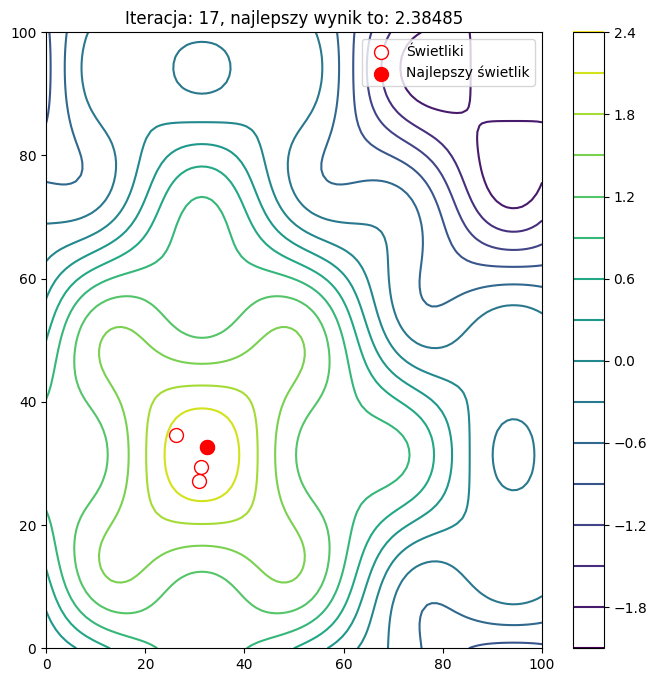

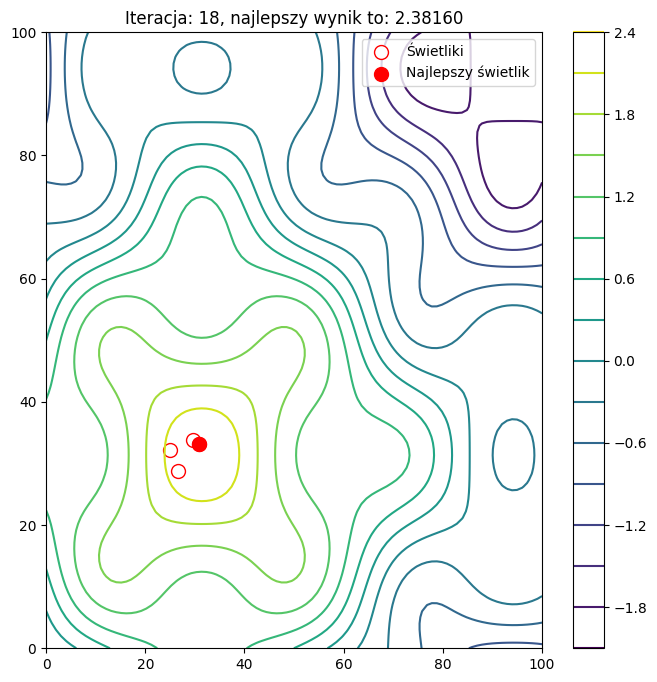

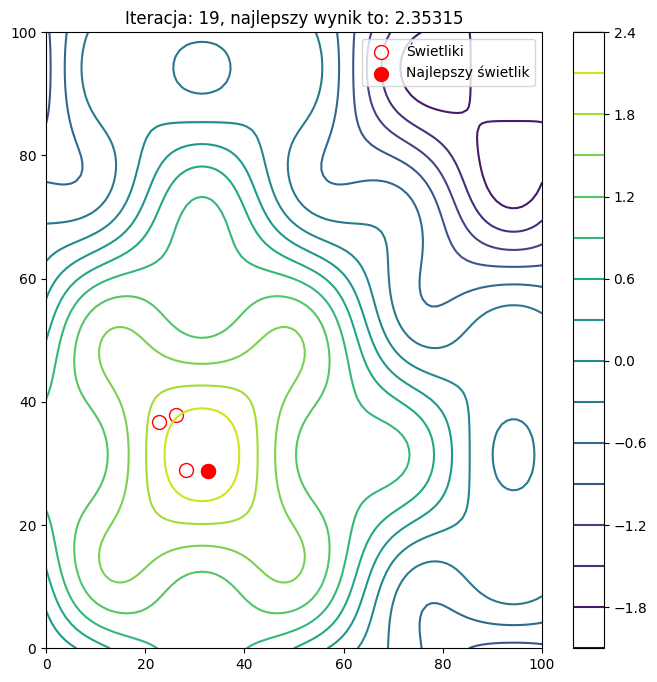

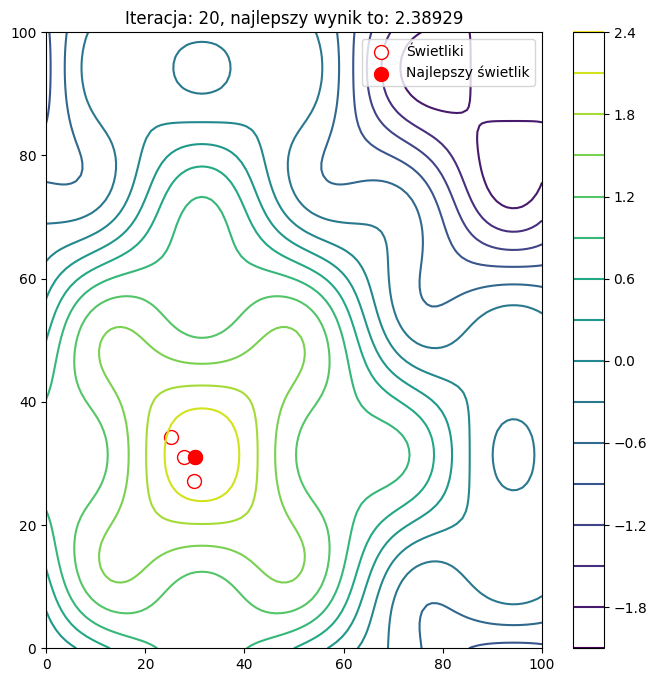

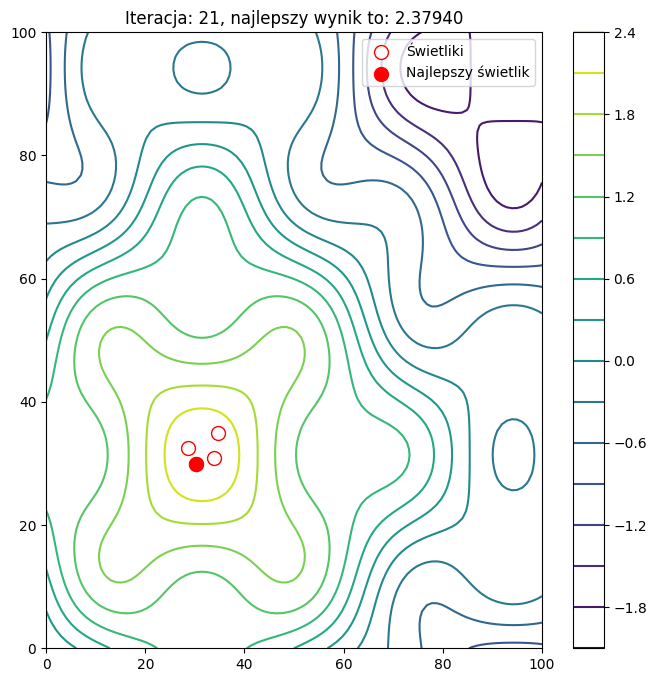

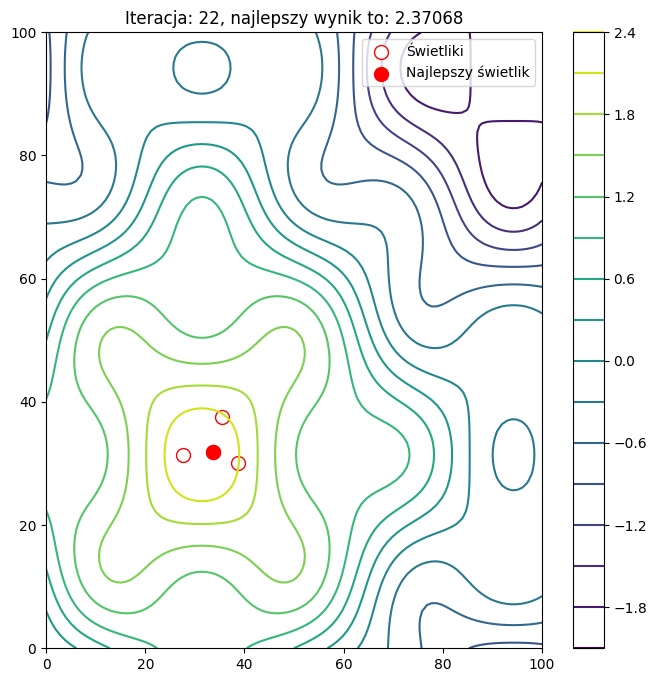

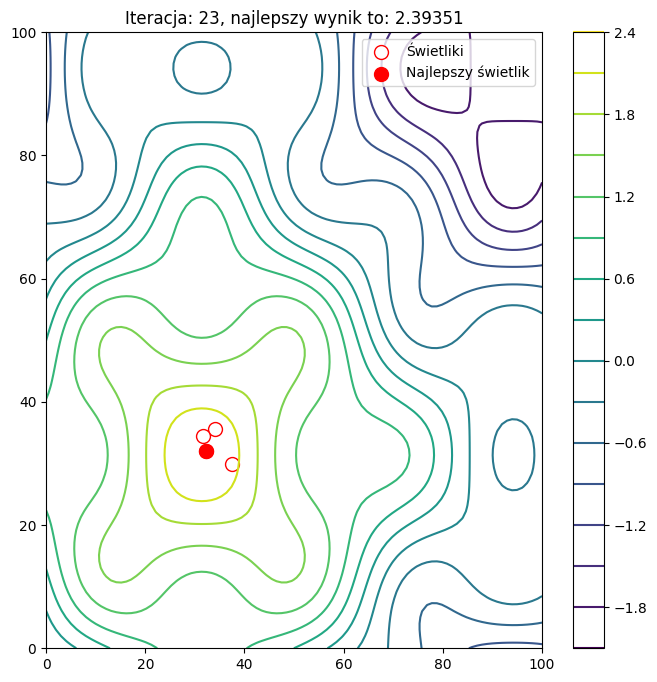

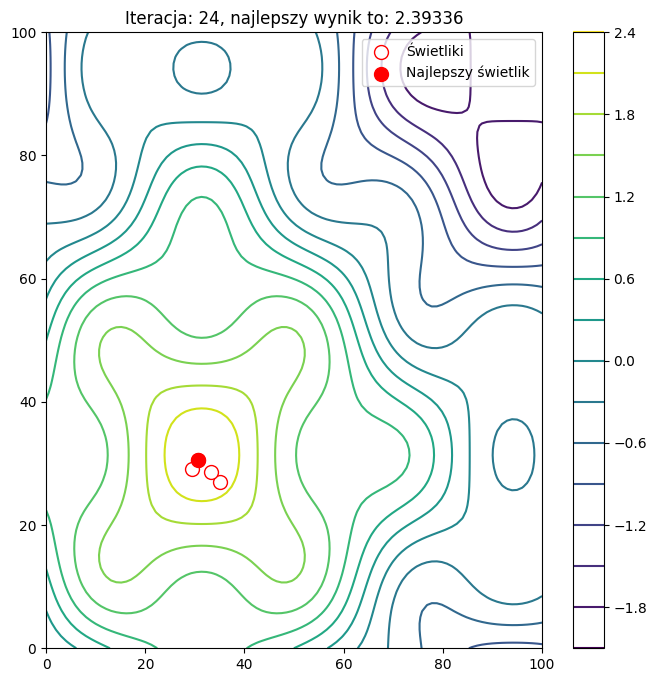

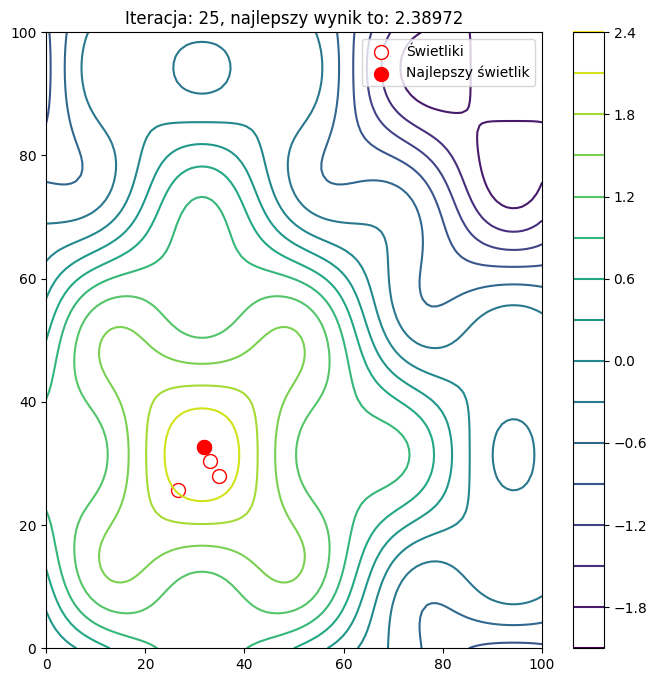

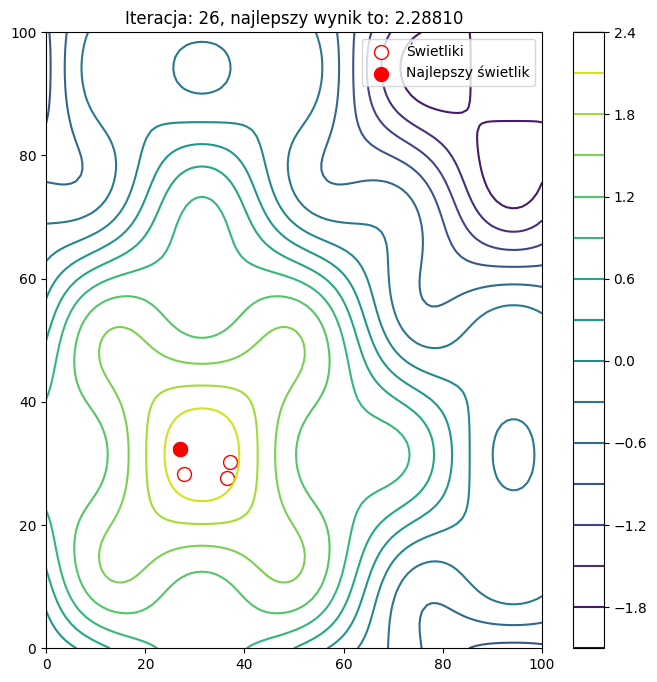

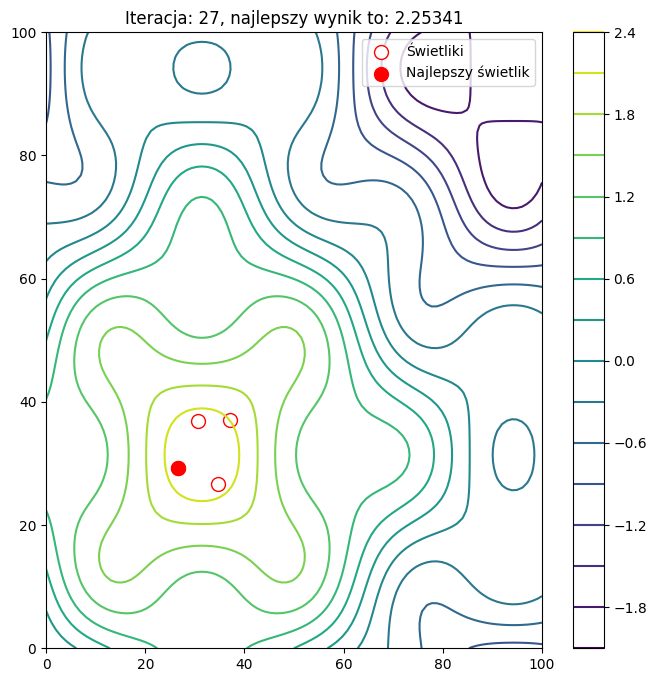

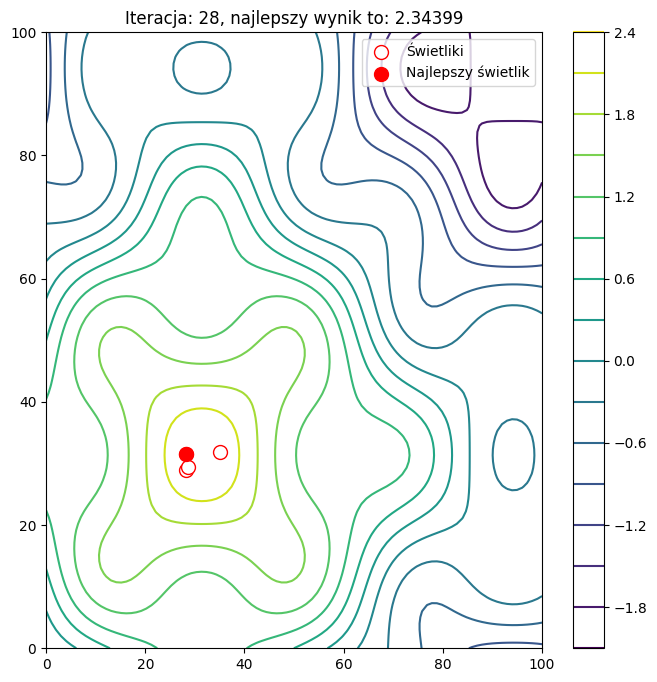

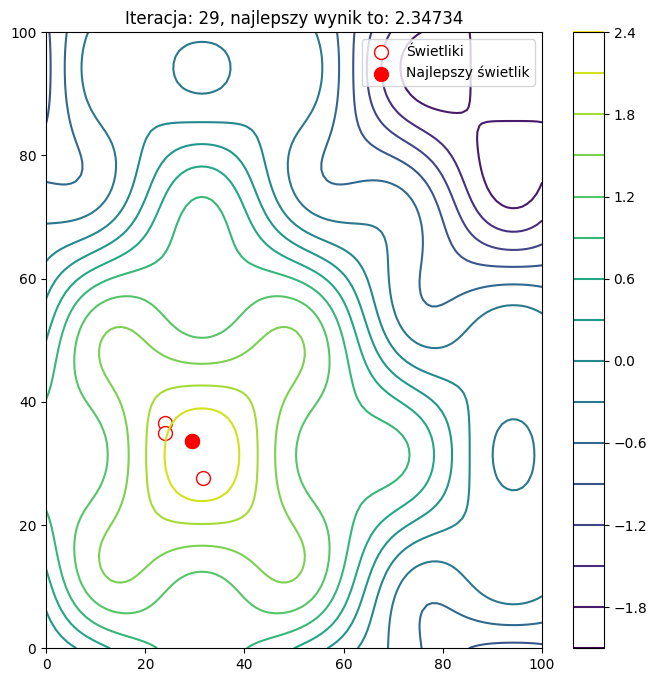

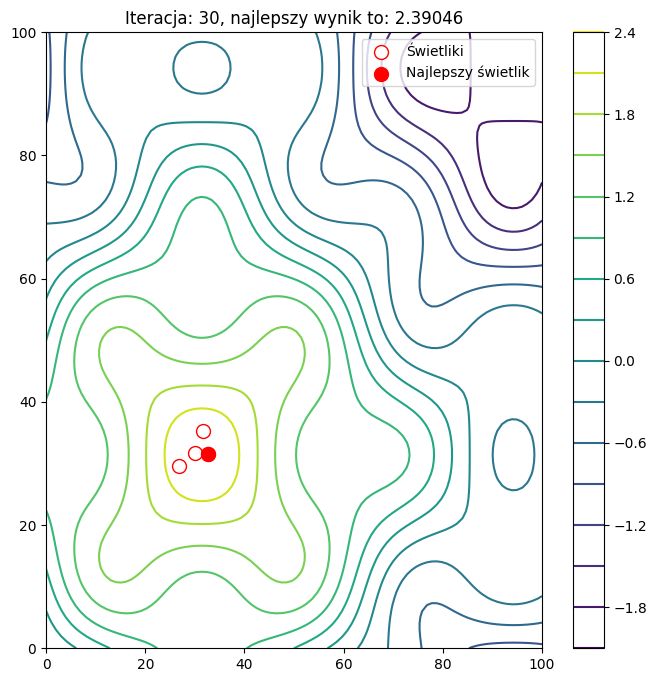

Najlepszy świetlik: [32.70397162 31.48718317]
Największa wartość funkcji: 2.390455545744257


In [283]:
for i in range(ITERACJE_LICZBA):  # 4. Wykonaj algorytm w pętli przez iteracje_liczba razy
    brightness = np.array([funkcja_przystosowania(x[0], x[1]) for x in X])  # 4.1. Oceń wszystkie osobniki (za pomocą funkcji F()), niech Fi to aktualna ocena osobnika xi
    for a in np.random.permutation(N):  # 4.2. Pętla po wszystkich osobnikach, a to identyfikator osobnika. Najlepiej, aby a było iterowane w losowej kolejności
        for b in np.random.permutation(N):  # 4.2.1. Pętla po wszystkich osobnikach, b to identyfikator osobnika. Najlepiej, aby b było iterowane w losowej kolejności
            if brightness[b] > brightness[a]:  # 4.2.1.1. Jeśli przystosowanie b-tego osobnika jest lepsze niż a-tego osobnika, czyli Fb > Fa
                beta = BETA_0 * np.exp(-GAMMA * np.sum((X[a] - X[b]) ** 2))  # 4.2.1.1.1. Wylicz poziom przyciągania
                X[a] += beta * (X[b] - X[a])  # 4.2.1.1.2. Zastosuj przyciąganie dla każdego i.
                brightness[a] = funkcja_przystosowania(X[a][0], X[a][1])  # 4.2.1.1.3. Uaktualnij wartość Fa
        X[a] += np.random.uniform(-MU, MU, size=n)  # 4.2.2. Dodaj mutację, czyli Xa,i += losowa z przedziału (-mui; +mui), dla każdego i.
        brightness[a] = funkcja_przystosowania(X[a][0], X[a][1])  # 4.2.3. Uaktualnij wartość Fa

    best_index = np.argmax(brightness)
    best_firefly = X[best_index]
    best_rating = brightness[best_index]
    rysuj_iteracje(X, best_firefly, best_rating, i)

print('Najlepszy świetlik:', best_firefly)
print('Największa wartość funkcji:', best_rating)